In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1. Cargamos Dataset

In [47]:
data = pd.read_csv("titanic.csv")

In [48]:
print(str(data.shape) + '\n')

(891, 12)



In [49]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Eliminamos columna de id

In [50]:
data.drop('PassengerId', axis =1, inplace = True)
print(str(data.shape))

(891, 11)


### 2. Análisis de Datos para toma de decisiones en FE Pipeline

#### 2.1 Análisis del target


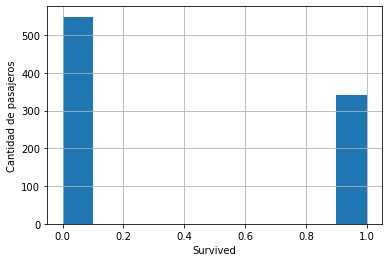

In [51]:
data['Survived'].hist()
plt.xlabel('Survived')
plt.ylabel("Cantidad de pasajeros")
plt.show()

### 2.2 Verificamos tipos de variables en x

In [52]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [53]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
#data.dtypes

cat_vars = cat_vars + ['Pclass']

In [54]:
# Cantidad de variables categóricas
len(cat_vars)

6

In [55]:
cat_vars

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']

In [56]:
#Asegurarnos que todas quedan tipo categoría

data[cat_vars] = data[cat_vars].astype('O')
data[cat_vars].dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Pclass      object
dtype: object

In [57]:
#Variables numericas
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'Survived')]

In [58]:
data[num_vars].dtypes

Age      float64
SibSp      int64
Parch      int64
Fare     float64
dtype: object

### 2.3 Análisis de valores faltantes (verificar el pñorcentaje de pérdida y cómo impacta el target)

In [59]:
var_with_na = [var for var in data.columns if (data[var].isnull().sum() > 0)] #is null mapea True o False, y por eso se suma
len(var_with_na)

3

In [60]:
#proporcion de NAs en cada variable
data[var_with_na].isnull().mean().sort_values(ascending = False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

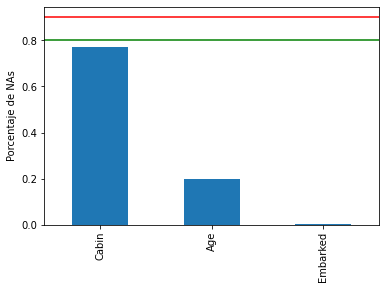

In [61]:
#Porcentajes de NAs
data[var_with_na].isnull().mean().sort_values(ascending= False).plot.bar()
plt.ylabel("Porcentaje de NAs")
plt.axhline(y=0.9, color= "r")
plt.axhline(y=0.8, color= "g") #abajo de esta línea es rescatable

In [62]:
cat_na = [var for var in cat_vars if var in var_with_na]
cat_na

['Cabin', 'Embarked']

In [63]:
#variables numericas con NAS
num_na = [var for var in num_vars if var in var_with_na]
num_na

['Age']

In [64]:
print("Cantidad de variables numéricas con NAs. {}".format(len(num_na)))
print("Cantidad de variables categóricaas con NAs. {}".format(len(cat_na)))

Cantidad de variables numéricas con NAs. 1
Cantidad de variables categóricaas con NAs. 2


### 2.3.1 Qué tanto impacta el NA contra el target? Verificación 

In [65]:
#Funcion
def na_impact_over_target(df,Xvar, Yvar):
    df = data.copy()
    df[Xvar] = np.where(df[Xvar].isnull(), 1, 0)
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std'])
    temp.plot(kind = "barh", y="mean", xerr="std", legend=False, title=Yvar)
    plt.show()

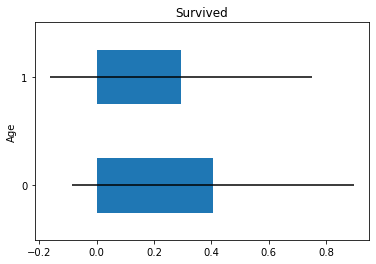

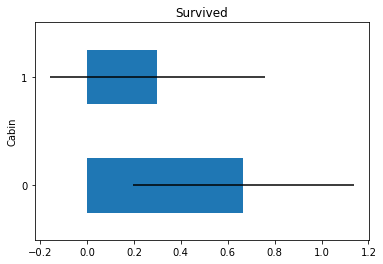

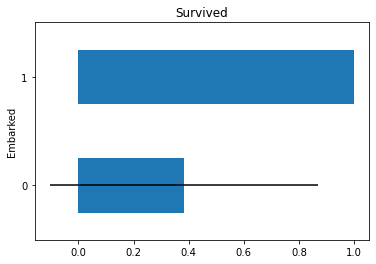

In [66]:
for var in var_with_na:
    na_impact_over_target(data, var, 'Survived')

### 2.4 Análisis de variables temporales

No se cuentan con variables temporales.

### Análisis de variables

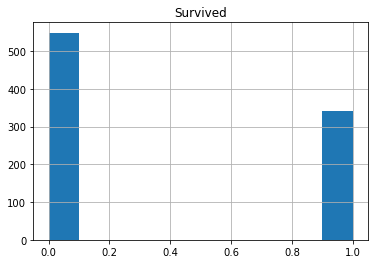

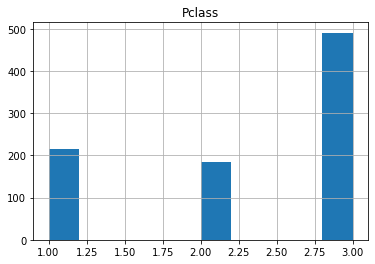

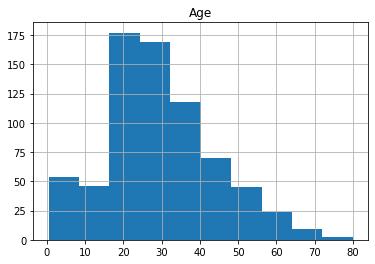

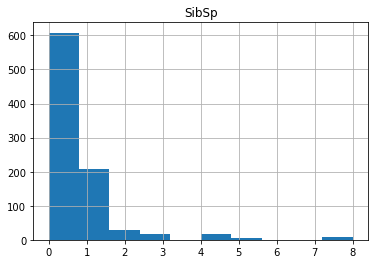

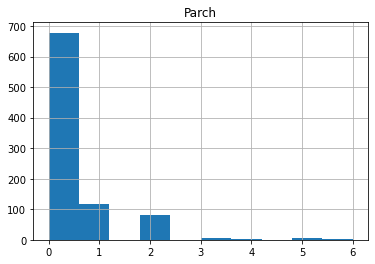

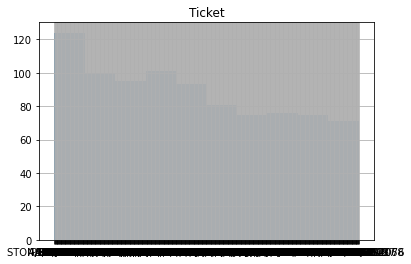

In [67]:
#Subset con únicamente datos numéricos
Numerical = data.iloc[:, [0, 1, 4, 5, 6, 7]]

#Visualización de datos
for column in Numerical:
  Numerical[column].hist()
  plt.title(column)
  print("")
  plt.show()